# Face recognation using haarcascade classifier

### opencv is the library used when we want to work with images and videos

### !pip install opencv-python

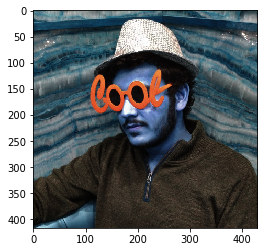

In [15]:
import cv2
from matplotlib import pyplot as plt


ans=cv2.imread('mdata.png')
plt.imshow(ans)
plt.show()

## open cv by default read in BGR format and matplot write in RGB format

### Direct color conversion of RGB TO BGR  command inside the imread function will not work, however the conversion to gray occurs .I dont know why

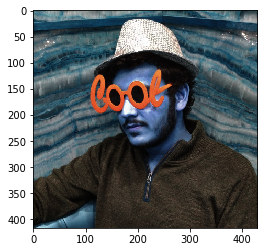

In [16]:
# open cv is used to work with images and videos
# matplotlib have function (plt.imshow) which is use to display the image i.e imshow(image_object_name)
# ans is a image object
# open cv by defalut read in BGR format and plt write in RGB i.e basically red and blue channels get swapped

import cv2
from matplotlib import pyplot as plt


ans=cv2.imread('mdata.png',cv2.COLOR_BGR2RGB)
plt.imshow(ans)
plt.show()

### Working with gray images consumes less computational power

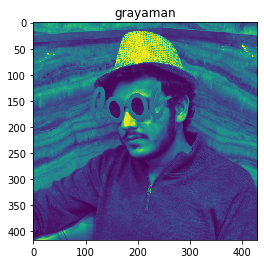

In [19]:
temp_ans=cv2.imread('mdata.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(temp_ans)
plt.title('grayaman')
plt.show()

### For color conversion cvtColor is used

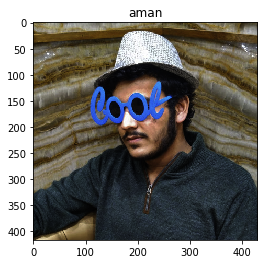

In [18]:
new_ans=cv2.cvtColor(ans,cv2.COLOR_BGR2RGB)
plt.imshow(new_ans)
plt.title('aman')
plt.show()

### (0,0,0) -> Black and (255,255,255) --> White

In [11]:
print(new_ans.shape)

# We have 417 rows and 430 cols and each block have 3 RGB values and all 3 values are in between 0 to 255

(417, 430, 3)


### cv2 also have imshow like plt which open image in desktop, imshow of cv2 shows in BGR and imread of cv2 reads in BGR so colors are not swapped

In [20]:
#  0 means wait for infinite time say 1000 means wait for 1000 millisecond i.e 1 second
#  After wating for infinite time destory all windows
# If we have written waitkey(0) then this juypter block will not complete its execution


img=cv2.imread('mdata.png')
cv2.imshow('ME',img)
cv2.waitKey(1000)
cv2.destroyAllWindows()

# Working with videos

### Haar Cascade is a machine learning object detection algorithm or a classifier used to identify objects in an image or video  it is well known for faces but can be trained for any object

### A Haar Cascade is basically a classifier which is used to detect the object for which it has been trained for, from the source. The Haar Cascade is trained by superimposing the positive image over a set of negative images(i.e image which does not contain object). The training is generally done on a server and on various stages

#### Since this is MLU, they found that Administrator C had the most predictive power. Let's weight her vote higher. Unfortunately, she was only successful at predicting 60% of the time.
#### The next most powerful predictor was administrator D, but D's answers were very correlated with C. It was as if they were considering the same criteria, but C was just better at it. So let's put D aside for now.
#### D is better than F, but F appears to be looking at some different criteria than C or D (perhaps focusing on extra curricular activities instead of academics). F's predictive power is less than C or D, but combined with C, F adds more information than D would. That is, C and F is a better classifier than C and D even though D is better than F. 


### AdaBoost is a type of "Ensemble Learning" literally means adaptive boosting where multiple learners are employed to build a stronger learning algorithm. AdaBoost works by choosing a base algorithm (e.g. decision trees) and iteratively improving it by accounting for the incorrectly classified examples in the training set. i.e adaboost will increase the weight of incorrect examples in next iteration i.e classifier which have failed during one phase should have been given greater attention in next phase

### In Adaptive boosting only the feature which contribute most to describe a particular object are selected in final classifier

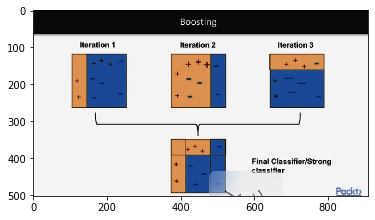

In [2]:
import cv2
from matplotlib import pyplot as plt  
asd=cv2.imread('adabost.png')
plt.imshow(asd)

""" Below image is the crux of adaabost"""

#### AdaBoost is that in certain dataset types, one classifier alone may not be enough to determine the class. AdaBoost works on the training phase, seeing how some classifier who failed during the classification should be payed greater attention (increase the weight) because it 'takes care of special cases of classification'. Increasing the weight is special feature of adaboost which is not generally done by boosting

# Working with Videos

### Create a VideoCapture object. Its argument can be either the device index or the name of a video file. Device index is just the number to specify which camera.

# Task --->show the gray video on web cam

In [13]:
from matplotlib import pyplot as plt
import numpy as np
import cv2


# 0 means using the default web cam
cap = cv2.VideoCapture(0)


while(True):
    ret, frame = cap.read()
    
    if ret==False:
        continue
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

        
cap.release()
cv2.destroyAllWindows()

#### waitKey(0) will display the window infinitely until any keypress (it is suitable for image display). and waitKey(1) will display a frame for 1ms and then automatically close that frame i.e seems like a video i.e cap.read() keep on refreshing itself multiple times when waitkey(1) is used

# Task -> Run the indevice video

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture('yoyo.mov')

while(cap.isOpened()):
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

### 0xFF is a hexadecimal constant which is 11111111 in binary. By using bitwise AND (&) with this constant, it leaves only the last 8 bits of the original (in this case, whatever cv2.waitKey(0) is).

## Working with haarcascade classifier

In [16]:
import cv2
cap=cv2.VideoCapture(0)

face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")


while True:
    ret,frame=cap.read()
    gray_frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    
    if ret==False:
        continue
    
    
    # face_cascade object has a function(method) known as detectMultiScale
    faces=face_cascade.detectMultiScale(gray_frame,1.3,5)
    
    
     # dectectMultiScale will return list of tupules i.e list if multiple faces are present there top left coordinate
     # and width and height of the faces i.e (x,y,w,h)


    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        
        # (255,0,0) This is color of the frame
        # giving top left (i.e x,y)  and bottom right (i.e x+w,y+h) coordinates to the rectangle function
        # Box will be of blue color as BGR values will be (255,0,0)

        
    cv2.imshow("videoframe",frame)
    
    key_pressed=cv2.waitKey(1) & 0xFF
    
    if key_pressed==ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()    

#### 1.3 is the scaling factor i.e how much the image size is reduces here by 30% say 1.05 means 5% as haarcascade   is being train on a specific size of images so we have to to reduce the size of our frame to fit to that frame  and second is number of neighbours i.e here 5 is the number of neighbours a rectangle should have 3 to 6 is a  good value 

In [2]:
# ord gives the ASCII value of the symbol which is between 0 to 255 which is a 8 bit integer

print(ord('A'))
print(ord('q'))

65
113


# Capture Largest face and store that 2-d image in a linear vector of numpy

In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy


# initilaize the campera using VideoCapture if it is 0 then default web web cam else give the id of web cam

cap=cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")

while True:
    ret,frame=cap.read()
    if ret==False:
        continue
        
    
    cv2.imshow("Video_frame_name",frame)
    
    # detectMultiScale take the value of scaling parameter i.e 1.3 and number of neighbours i.e 5
    faces=face_cascade.detectMultiScale(frame,1.3,5)
    
    # This will print All the tuples of x,y,w,h
    print(faces)
    
    for face in faces:
        x,y,w,h=face
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
    cv2.imshow("frame",frame)
        
        
    key_pressed=cv2.waitKey(1) & 0xFF
    if key_pressed==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows() 


()
()
()
()
()
()
()
()
()
()
()
[[580  76 312 312]]
[[595 130 288 288]]
[[612 183 255 255]]
[[606 188 253 253]]
[[593 186 246 246]]
[[588 174 246 246]]
[[584 157 260 260]]
[[574 140 273 273]]
[[567 116 282 282]]
[[542  55 317 317]]
[[522  20 345 345]]
()
()
()


### Here ( ) is when we on juypter and number occur when my face projects on web cam i.e (x,y,w,h) co-ordinates of face

## From  multiple faces detect largest face  and store that face into an linear numpy array as a .npy file in the folder name Face_Recog_Data

In [1]:
import cv2
import numpy as np



# 0 is basically the id of the camera front camera in my case
cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")



skip = 0
face_data = []
dataset_path = './Face_Recog_Data/'
file_name = input("Enter the name of the person : ")




while True:
    ret,frame = cap.read()

    if ret==False:
        continue
        
    
    # Converting Color to save the image in gray color as it will save the memory and makes computation faster
    
    gray_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(frame,1.3,5)
    # Each face is a list of tupule i.e [(x,y,w,h),(x1,y1,w1,h1)........]
    
    
    if len(faces)==0:
        continue
    
    
    # We have (x,y,w,h) and we want to sort on the basics of w and h i.e f[2] and f[3]
    # We are sorting if the frame have multiple faces 
    # We are sorting on the basis of area
    faces = sorted(faces,key=lambda f:f[2]*f[3])
    

    # Pick the last face (because it is the largest face acc to area(f[2]*f[3]))
    # As sorting occurs in ascending order so start from last face i.e largest face or sort in descending order
    # If we want a descending sorting then faces = sorted(faces,key=lambda f:f[2]*f[3],reverse=True)
    
    # Pick the last face as ascending sorting so last face is largest by area
    for face in faces[-1:]:
        x,y,w,h = face
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        
        # This (0,255,255) is in BGR format
        # 2 is the thickness of the line
        # Extract (Crop out the required face) : Region of Interest
        # In frame by convection the coordinates as frame[y-axis,x-axis] i.e first we have y-axis then x-axis
        # Add a padding of 10 pixels along each side of face
        # i.e offset=10 i.e for face add the offset of 10 along each side
        
        
        
        
        # Setting the padding and then resizing the face to a 100* 100 image
        offset = 10
        
        # In frame by convection the first axis is y axis then x axis i.e frame[y_axis,x_axis]
        face_section = frame[y-offset:y+h+offset,x-offset:x+w+offset]
        face_section = cv2.resize(face_section,(100,100))
        
        
        
        # Say we are storing every 10th face
        skip += 1
        if skip%10==0:
            face_data.append(face_section)
            print(len(face_data))
            #i.e how may faces we have captured so far

    
    cv2.imshow("Frame",frame)
    cv2.imshow("Face Section",face_section)
    
    
    # waitKey(1) is a 32 bit integer and 0xFF is 8 one's
    # If we press 'q' then program will be terminated
    key_pressed = cv2.waitKey(1) & 0xFF
    if key_pressed == ord('q'):
        break

        
# Convert our face list array into a numpy array(i.e list to array conversion)
face_data = np.asarray(face_data)


# number of rows should be equal to number of faces and number of coloums should be figured out automatically
face_data = face_data.reshape((face_data.shape[0],-1))
print(face_data.shape)


# Save this data into file system
# file_name = input("Enter the name of the person : ") we have taken the input above

np.save(dataset_path+file_name+'.npy',face_data)
print("Data Successfully save at "+dataset_path+file_name+'.npy')



cap.release()
cv2.destroyAllWindows()

    

Enter the name of the person : aman
1
(1, 30000)
Data Successfully save at ./Face_Recog_Data/aman.npy


### Classifying Images using  KNN 

### Problem with knn is that imbalanced dataset (say yes=10000 and no=10 and we want to have k=150, to the point which is actually near to the "no" wil give wrong answer)  and outliers affect the Prediction in case of KNN

# Quick Implementation of KNN


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



df = pd.read_csv("Classified Data")
df.head(n=2)

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0


In [4]:
# Hence to overcome this we use index_col
df=pd.read_csv("Classified Data",index_col=0)
df.head(n=2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0


### Standardizing the variable is important any variables that are on a large scale will have a much larger effect on the distance between the observations

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



# Droping the target class as it is a dependent feature and all other are independent feature
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))




# Skiping the last coloumn and picking up all the cols
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head(n=3)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850


## Train Test Split

In [7]:
from sklearn.model_selection import train_test_split


# Independent Feature == scaled_features
# Dependent Feature   == df[TARGET CLASS]

X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

## KNN IMPLEMENTATION

In [8]:
from sklearn.neighbors import KNeighborsClassifier



knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1])

In [9]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[140  24]
 [ 10 126]]


In [10]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       164
           1       0.84      0.93      0.88       136

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



## Choosing a K Value between 1 to 40

Text(0, 0.5, 'Error Rate')

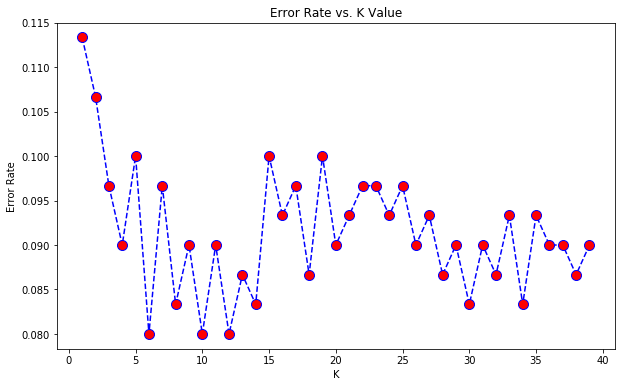

In [12]:
error_rate = []



for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### We will not chose the absolute low values as they may lead to over fitting as error is very very less there say the values such as 5

## Extract the face from testing data and then see from whose face our face resemble the most in Training data

## Read the Video stream and extract faces for testing purpose i.e for which we want to Predict the label

## Map  ID to the name of the user i.e we will use dictonary for that purpose

In [3]:
import cv2
import numpy as np 
import os 





# # # KNN ALGORITHM # # #


# Calculating Eucledian distance
def distance(v1,v2):
    return np.sqrt(((v1-v2)**2).sum())



def knn(train,test,k=5):
    dist=[]
    
    for i in range(train.shape[0]):
        
        # Using the last coloumn as label part as rest of the coloumn as feature part
        ix=train[i,:-1]
        iy=train[i, -1]
        
        
        # Compute the distance from test Point
        d=distance(test,ix)
        dist.append([d,iy])
        
        
        # Sort on the basics of distance and get the top K values
        dk=sorted(dist,key=lambda x:x[0])[:k]
        
        # Retrieve only the labels
        labels = np.array(dk)[:, -1]
        
        # Get frequencies of each label
        output = np.unique(labels, return_counts=True)
        
        # Find max frequency and corresponding label
        index = np.argmax(output[1])
        return output[0][index]
    
    
    
        
#Init Camera
cap = cv2.VideoCapture(0)


# Using CascadeClassifier for detecting Face 
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")


skip = 0
dataset_path = './data/'


# face_data is our training data we will Load all the files i.e X values of the data
face_data = [] 


# labels will form the Y values for the data
labels = []


# Labels for the given file
class_id = 0 


# Using dictonary for Mapping btw id - name
names = {} 
      


# Data Preparation


# listdir is the command use to see all the files in the particular folder 
for fx in os.listdir(dataset_path):
    
    # If we have a numpy file
    if fx.endswith('.npy'):
        
        
        # Create a mapping btw class_id and name
        # Say class id is given by aman.npy so cut last four char i.e .npy and then save as class id
        names[class_id] = fx[:-4]
        print("Loaded "+fx)
        
        
        # Giving the file name along with the path 
        # This will load the File
        data_item = np.load(dataset_path+fx)
        face_data.append(data_item)

        
        # Create Labels for the class
        # Matrix of ones multiply with the class_id
        target = class_id*np.ones((data_item.shape[0],))
        class_id += 1
        labels.append(target)
        
        
# To have multiple Matrix to concatenate to a Single matrix
# axis tells us in which direction we want to do the concatenation

face_dataset = np.concatenate(face_data,axis=0)
face_labels = np.concatenate(labels,axis=0).reshape((-1,1))

print(face_dataset.shape)
print(face_labels.shape)



# Now we are concatenating both X and Y values into a Single Training Matrix as 
# KNN accept only a single Training matrix in which we would have X data and Y data combined in a single matrix


# Now Here our last coloumn is the label part and Rest of the coloumn is feature part
trainset = np.concatenate((face_dataset,face_labels),axis=1)
print(trainset.shape)



    
# Testing for testing purpose we need to read the video stream

while True:
    ret,frame = cap.read()
    if ret == False:
        continue

    faces = face_cascade.detectMultiScale(frame,1.3,5)
    if(len(faces)==0):
        continue

    for face in faces:
        x,y,w,h = face

        # Getting the Region of Interest by using the offset
        offset = 10
        face_section = frame[y-offset:y+h+offset,x-offset:x+w+offset]
        face_section = cv2.resize(face_section,(100,100))

        #Predicted Label (out)
        # Here we are Giving the Linear part of our Face Section i.e we can also use the flatten Function
        out = knn(trainset,face_section.flatten())

        
        # Display on the screen the name and rectangle around it
        # Reading the Predcited name in the dictonary by using the label i.e say names[1] is aman
        pred_name = names[int(out)]
        
        
        
        cv2.putText(frame,pred_name,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2,cv2.LINE_AA)
        # 2 is thickness and cv2.LINE_AA is recommended for better looks
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)

        
        
    cv2.imshow("Faces",frame)

    key = cv2.waitKey(1) & 0xFF
    if key==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

ValueError: need at least one array to concatenate